<a href="https://colab.research.google.com/github/abakashi/dinamicas_dex_days/blob/main/dinamica_day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
dataset = pd.read_csv('2019-Nov.csv')
dataset['event_time'] = pd.to_datetime(dataset['event_time'],
                        format='%Y-%m-%d %H:%M:%S %Z')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 318.3+ MB


In [3]:
dataset.price.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.99])
#preços negativos detectados. Iniciando análise.

count    4.635837e+06
mean     8.120701e+00
std      1.879197e+01
min     -7.937000e+01
1%       3.000000e-01
10%      8.700000e-01
25%      1.940000e+00
50%      3.970000e+00
75%      6.350000e+00
99%      9.365000e+01
max      3.277800e+02
Name: price, dtype: float64

In [4]:
null_percent = dict()
columns = tuple(dataset.columns)

for column in columns:
  null_percent[column] = dataset[column].isna().sum() / dataset.shape[0]

sorted(null_percent.items(), key=lambda x: x[1], reverse=True)

# O category_code é o que mais possui valores nulos, seguido de brand.
# Brand (marca) é importante para a análise a ser desenvolvida, logo, deve ser mantida.
# sugestão de remover o category_code.

[('category_code', 0.9836603400852963),
 ('brand', 0.42840785817102717),
 ('user_session', 0.0001753728614703235),
 ('event_time', 0.0),
 ('event_type', 0.0),
 ('product_id', 0.0),
 ('category_id', 0.0),
 ('price', 0.0),
 ('user_id', 0.0)]

In [5]:
#verificando linhas duplicadas:
dataset.duplicated().sum()
#linhas duplicadas encontradas

246693

In [6]:
#removendo linhas duplicadas
dataset[~dataset.duplicated()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


In [7]:
#removendo category_code
dataset.drop('category_code', axis=1, inplace=True)

In [8]:
#Buscando por eventos cujos preços são negativos.
neg_price = dataset[dataset['price'] < 0].sort_values('price')

print(neg_price.shape)
neg_price
# Os eventos são do tipo compra, não deveriam ter valores negativos.

(17, 8)


,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
749942,2019-11-06 17:31:51,purchase,5716861,1487580014042939619,NaN,-79.37,554241372,b85719db-2c56-460b-b800-d7a47d4c4d70
330623,2019-11-03 18:47:04,purchase,5716859,1487580014042939619,NaN,-47.62,567194545,fd27b149-3006-41cd-8afc-884c47272e5d
3306219,2019-11-23 13:30:53,purchase,5716859,1487580014042939619,NaN,-47.62,574878046,b60c5299-7a53-e636-6dc3-c7fd5d86452b
3093813,2019-11-22 13:46:53,purchase,5716859,1487580014042939619,NaN,-47.62,540003383,33da1676-00df-4f21-b87e-4c1b9b09420c
2909975,2019-11-21 19:34:16,purchase,5716859,1487580014042939619,NaN,-47.62,419166079,7e76a460-adb4-4e3f-9c85-c08a97016aa0
1372173,2019-11-10 20:16:38,purchase,5716857,1487580014042939619,NaN,-23.81,549736485,d1acbc83-3876-4317-a00f-6c60800f4572
3114212,2019-11-22 15:18:19,purchase,5716857,1487580014042939619,NaN,-23.81,541269785,3d92c5f7-5d6d-4df6-83ad-6fcdb4078761
2310273,2019-11-18 07:06:17,purchase,5716857,1487580014042939619,NaN,-23.81,565309368,47af9baa-94af-4334-a4ac-514230ddfa9c
4378008,2019-11-29 14:00:23,purchase,5716857,1487580014042939619,NaN,-23.81,480927132,e2a0c787-1f5b-4bd6-b449-9818addd688f
408238,2019-11-04 11:54:29,purchase,5716857,1487580014042939619,NaN,-23.81,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015


In [9]:
#Averiguando categorias de ID que possam ser relevantes dentro do subconjunto.
neg_unique = {'category_id': neg_price.category_id.unique(),
              'product_id': neg_price.product_id.unique()}
neg_unique

{'category_id': array([1487580014042939619]),
 'product_id': array([5716861, 5716859, 5716857, 5670257, 5716855])}

In [10]:
#ID de categoria se mostrou irrelevante para a análise.
print(dataset[dataset['category_id'].isin(neg_unique['category_id'])].shape)
dataset[dataset['category_id'].isin(neg_unique['category_id'])]

(95, 8)


,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
51479,2019-11-01 12:19:19,view,5670256,1487580014042939619,NaN,15.87,405803169,0afafe28-c096-4c9e-a0c2-1e2ece25b41c
52064,2019-11-01 12:23:46,view,5670256,1487580014042939619,NaN,15.87,479313682,91fbeeeb-a757-4732-92d9-9e0f45f2daf2
73174,2019-11-01 15:36:23,purchase,5716855,1487580014042939619,NaN,-7.94,566480066,34fa4291-9e2e-470f-a678-b84d9bbbdfe3
87049,2019-11-01 17:50:51,view,5670256,1487580014042939619,NaN,15.87,554241372,b6da9e24-30be-4ca0-a572-65b1c824c3c3
87772,2019-11-01 17:56:30,view,5670256,1487580014042939619,NaN,15.87,376918481,3240bc51-3851-40a5-a577-0099f94a5328
...,...,...,...,...,...,...,...,...
4337950,2019-11-29 10:35:37,cart,5670256,1487580014042939619,NaN,15.87,578851754,3b544ef7-65cb-45c4-987b-0eb8c2b34f29
4340630,2019-11-29 10:48:18,purchase,5670257,1487580014042939619,NaN,-15.87,569446220,14de64e5-bfbf-43e4-a3d9-362caf9f847e
4369944,2019-11-29 13:19:03,view,5670256,1487580014042939619,NaN,15.87,578809743,e243b7d6-45b0-4be1-838c-cd51b134f08e
4378008,2019-11-29 14:00:23,purchase,5716857,1487580014042939619,NaN,-23.81,480927132,e2a0c787-1f5b-4bd6-b449-9818addd688f


In [11]:
#Os preços negativos advém de determinados produtos, potencialmente um erro de
#digitação.
print(dataset[dataset['product_id'].isin(neg_unique['product_id'])].shape)
dataset[dataset['product_id'].isin(neg_unique['product_id'])]

(17, 8)


,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
73174,2019-11-01 15:36:23,purchase,5716855,1487580014042939619,NaN,-7.94,566480066,34fa4291-9e2e-470f-a678-b84d9bbbdfe3
330623,2019-11-03 18:47:04,purchase,5716859,1487580014042939619,NaN,-47.62,567194545,fd27b149-3006-41cd-8afc-884c47272e5d
408236,2019-11-04 11:54:29,purchase,5670257,1487580014042939619,NaN,-15.87,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015
408237,2019-11-04 11:54:29,purchase,5716857,1487580014042939619,NaN,-23.81,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015
408238,2019-11-04 11:54:29,purchase,5716857,1487580014042939619,NaN,-23.81,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015
706884,2019-11-06 11:51:26,purchase,5670257,1487580014042939619,NaN,-15.87,568159131,8edce83b-2d4c-4654-89e6-16234303031c
749942,2019-11-06 17:31:51,purchase,5716861,1487580014042939619,NaN,-79.37,554241372,b85719db-2c56-460b-b800-d7a47d4c4d70
749943,2019-11-06 17:31:51,purchase,5670257,1487580014042939619,NaN,-15.87,554241372,b85719db-2c56-460b-b800-d7a47d4c4d70
1372173,2019-11-10 20:16:38,purchase,5716857,1487580014042939619,NaN,-23.81,549736485,d1acbc83-3876-4317-a00f-6c60800f4572
2310273,2019-11-18 07:06:17,purchase,5716857,1487580014042939619,NaN,-23.81,565309368,47af9baa-94af-4334-a4ac-514230ddfa9c


In [12]:
#eliminando linhas com produtos com erro de digitação.
dataset = dataset[~dataset['product_id'].isin(neg_unique['product_id'])]
dataset.describe()

,product_id,category_id,price,user_id
count,4.635820e+06,4.635820e+06,4.635820e+06,4.635820e+06
mean,5.481405e+06,1.550049e+18,8.120837e+00,5.068069e+08
std,1.305584e+06,1.642374e+17,1.879184e+01,8.504383e+07
min,3.752000e+03,1.487580e+18,0.000000e+00,1.120748e+06
25%,5.723529e+06,1.487580e+18,1.940000e+00,4.698573e+08
50%,5.810145e+06,1.487580e+18,3.970000e+00,5.421750e+08
75%,5.856186e+06,1.487580e+18,6.350000e+00,5.680491e+08
max,5.909246e+06,2.195085e+18,3.277800e+02,5.799699e+08


In [13]:
dataset['event_type'].unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

In [39]:
brands = dataset.brand.unique()[1:]
num_bran = len(brands)

num_bran
# Existem 239 marcas únicas

239

In [18]:
#criando um dataframe com os registros sem marca.
df_brandless = dataset[dataset.brand.isna()]
df_brandless.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317032337,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
5,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
7,2019-11-01 00:00:32,view,5837835,1933472286753424063,NaN,3.49,514649199,432a4e95-375c-4b40-bd36-0fc039e77580


In [19]:
#Criando um dataframe onde todas os registros têm marca.
df_branded = dataset[~dataset.brand.isna()]
df_branded

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
2,2019-11-01 00:00:10,view,5837166,1783999064103190764,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100293687,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
6,2019-11-01 00:00:25,view,5856189,1487580009026551821,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
8,2019-11-01 00:00:34,remove_from_cart,5870838,1487580007675986893,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
9,2019-11-01 00:00:37,view,5870803,1487580007675986893,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
...,...,...,...,...,...,...,...,...
4635829,2019-11-30 23:59:27,remove_from_cart,5801131,1487580005486560104,irisk,3.65,566513990,b5053009-b3c4-4581-b05f-6199d1a2037e
4635830,2019-11-30 23:59:32,view,5795387,1487580005713052531,ingarden,7.14,576802932,2dc9ed07-93bb-47db-abe7-e9d88ed7ae94
4635833,2019-11-30 23:59:47,view,5733064,1487580004832248652,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47,view,5867785,1487580007835370453,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06


In [70]:
#Fazendo o estudo do preço para o dataframe novo
price_br = pd.DataFrame(df_branded.price.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.99]))
iqr = price_br.loc['75%'] - price_br.loc['25%']
bounds = (float((price_br.loc['25%'] - 1.5*iqr)),float((price_br.loc['75%'] + 1.5*iqr)))
bounds

(-4.984999999999999, 13.375)

In [26]:
#verificando quantidade de items por marca.
df_branded.brand.value_counts()

runail       324850
irisk        204158
grattol      203487
masura       187542
bpw.style    130306
              ...  
shifei            3
macadamia         2
footlogix         2
dessata           2
ibd               1
Name: brand, Length: 239, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


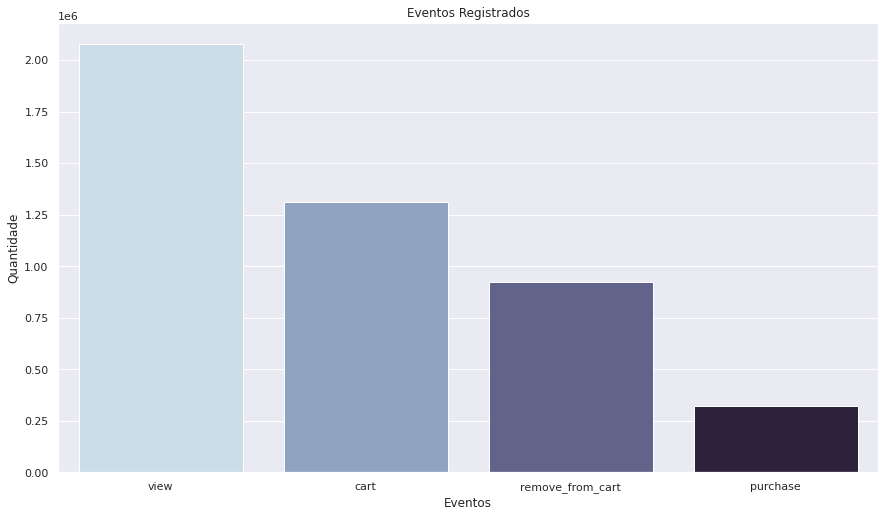

In [37]:
#Plotando gráfico de eventos usando o dataset com e sem marca.
events = dataset.event_type.value_counts()

sns.set(rc={'figure.figsize':(14.7,8.27)})

ax = sns.barplot(events.index, events, saturation= 0.75, order=['view', 'cart',
    'remove_from_cart', 'purchase'], palette="ch:s=.25,rot=-.25").set(
    title='Eventos Registrados', xlabel='Eventos', ylabel='Quantidade')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


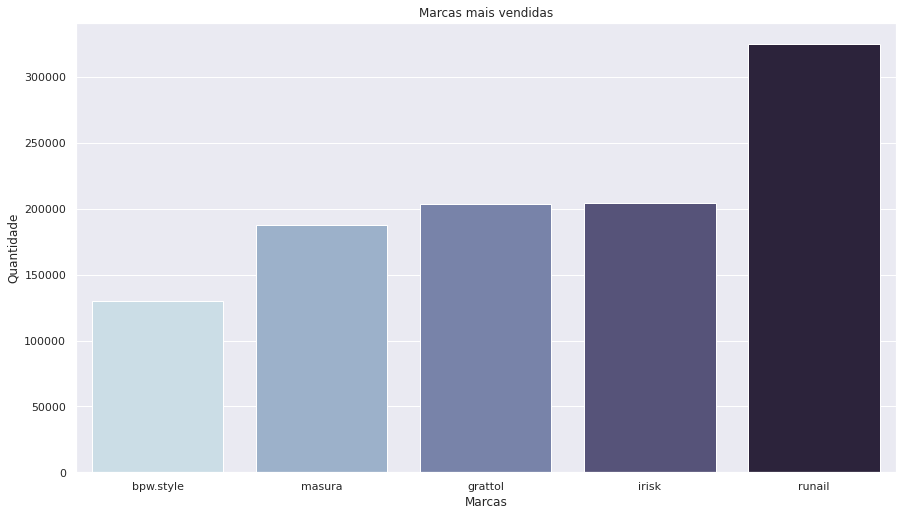

In [52]:
best_brands = df_branded[['brand', 'product_id']].groupby('brand').agg('count').sort_values('product_id').tail().reset_index()

ax = sns.barplot(best_brands.brand, best_brands.product_id, saturation= 0.75, 
                 palette="ch:s=.25,rot=-.25").set(title='Marcas mais vendidas',
                 xlabel='Marcas', ylabel='Quantidade')

